In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
btc_lobs = pd.read_csv('md/md/btcusdt_Binance_LinearPerpetual/lobs.csv', skipinitialspace=True)
btc_trades = pd.read_csv('md/md/btcusdt_Binance_LinearPerpetual/trades.csv', skipinitialspace=True)

eth_lobs = pd.read_csv('md/md/ethusdt_Binance_LinearPerpetual/lobs.csv', skipinitialspace=True)
eth_trades = pd.read_csv('md/md/ethusdt_Binance_LinearPerpetual/trades.csv', skipinitialspace=True)


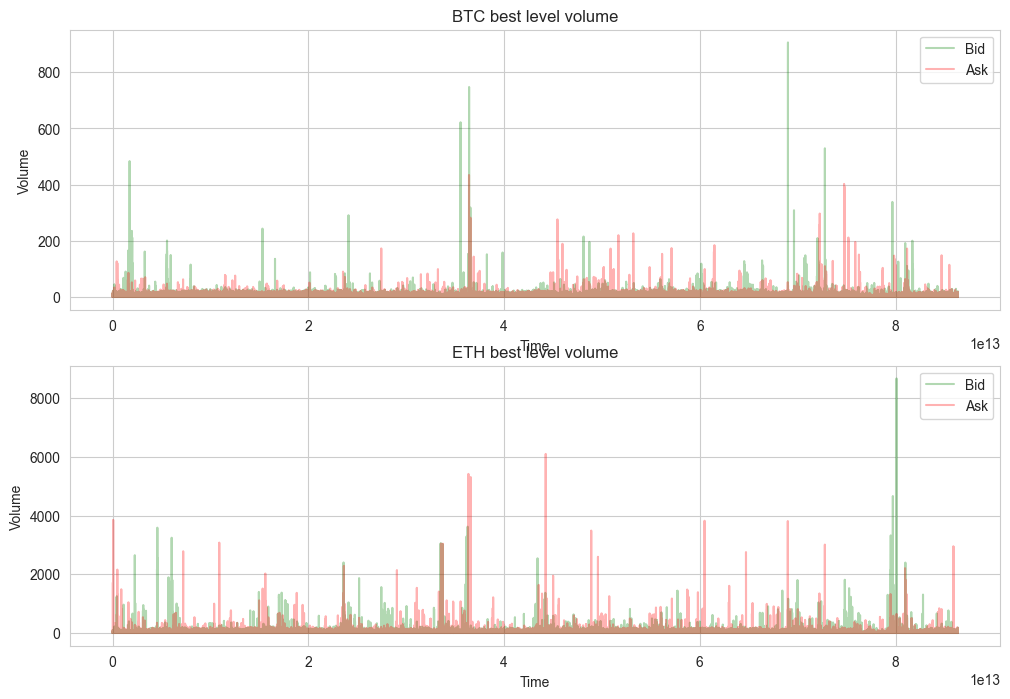

In [3]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

plt.subplot(211)
plt.plot((btc_lobs['receive_ts'] - btc_lobs['receive_ts'].min()), btc_lobs['btcusdt:Binance:LinearPerpetual_bid_vol_0'], color='green', alpha=0.3, label='Bid')
plt.plot((btc_lobs['receive_ts'] - btc_lobs['receive_ts'].min()), btc_lobs['btcusdt:Binance:LinearPerpetual_ask_vol_0'], color='red', alpha=0.3, label='Ask')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title("BTC best level volume")
plt.legend()

plt.subplot(212)
plt.plot((eth_lobs['receive_ts'] - eth_lobs['receive_ts'].min()), eth_lobs['ethusdt:Binance:LinearPerpetual_bid_vol_0'], color='green', alpha=0.3, label='Bid')
plt.plot((eth_lobs['receive_ts'] - eth_lobs['receive_ts'].min()), eth_lobs['ethusdt:Binance:LinearPerpetual_ask_vol_0'], color='red', alpha=0.3, label='Ask')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title("ETH best level volume")
plt.legend()

Text(0.5, 1.0, 'BTC best level ask price')

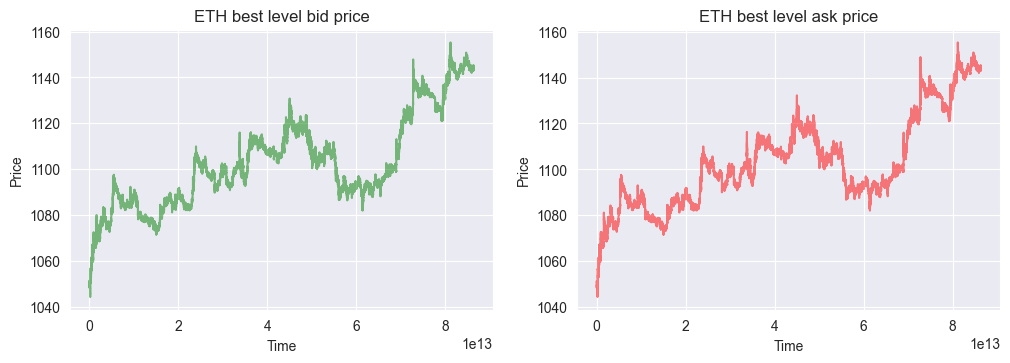

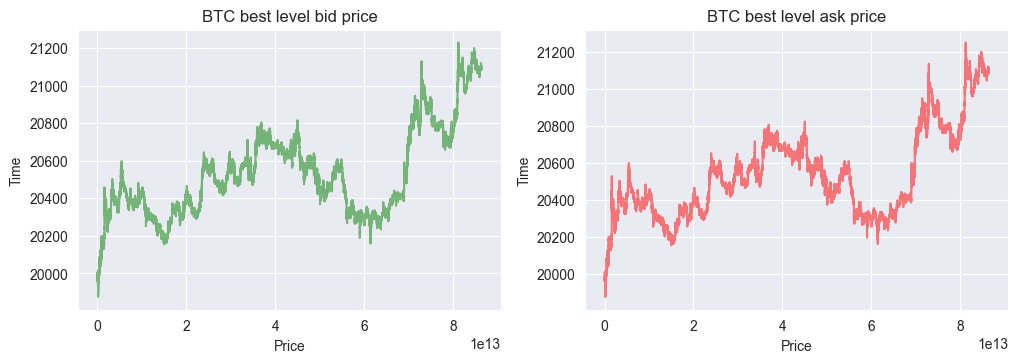

In [4]:
plt.figure(figsize=(12, 8))

sns.set_style('darkgrid')
plt.subplot(221)
plt.plot((eth_lobs['receive_ts'] - eth_lobs['receive_ts'].min()), eth_lobs['ethusdt:Binance:LinearPerpetual_bid_price_0'], color='green', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('ETH best level bid price')

plt.subplot(222)
plt.plot((eth_lobs['receive_ts'] - eth_lobs['receive_ts'].min()), eth_lobs['ethusdt:Binance:LinearPerpetual_ask_price_0'], color='red', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('ETH best level ask price')

plt.figure(figsize=(12, 8))

sns.set_style('darkgrid')
plt.subplot(223)
plt.plot((btc_lobs['receive_ts'] - btc_lobs['receive_ts'].min()), btc_lobs['btcusdt:Binance:LinearPerpetual_bid_price_0'], color='green', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Time')
plt.title('BTC best level bid price')

plt.subplot(224)
plt.plot((btc_lobs['receive_ts'] - btc_lobs['receive_ts'].min()), btc_lobs['btcusdt:Binance:LinearPerpetual_ask_price_0'], color='red', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Time')
plt.title('BTC best level ask price')

По графикам можно заметить, что у цен на эфир и биткоин схожие глобальные тренды.

Найдем следующие статистики для размера трейда BTC: 0.05 и 0.95 квантили, медиана, средняя, дисперсия

In [5]:
print('Mean: {} BTC\n0.05-quantile: {} BTC\n0.95-quantile: {} BTC\nMedian: {} BTC\nVariance: {} BTC\n'.format(btc_trades['size'].mean(), np.quantile(btc_trades['size'], 0.05), np.quantile(btc_trades['size'], 0.95), btc_trades['size'].median(), btc_trades['size'].var()))

Mean: 0.12200803165102181 BTC
0.05-quantile: 0.001 BTC
0.95-quantile: 0.519 BTC
Median: 0.017 BTC
Variance: 0.31323175143229426 BTC



Найдем следующие статистики для размера трейда BTC: 0.05 и 0.95 квантили, медиана, средняя, дисперсия

In [6]:
print('Mean trade size: {} ETH\n0.05-quantile: {} ETH\n0.95-quantile: {} ETH\nMedian: {} ETH\nVariance: {} ETH'.format(eth_trades['size'].mean(), np.quantile(eth_trades['size'], 0.05), np.quantile(eth_trades['size'], 0.95), eth_trades['size'].median(), eth_trades['size'].var()))

Mean trade size: 1.2198729337234182 ETH
0.05-quantile: 0.005 ETH
0.95-quantile: 5.0 ETH
Median: 0.153 ETH
Variance: 40.11740031016206 ETH


In [7]:
np.quantile(btc_trades['size'], 0.98)

1.0

Посмотрим распределение размера трейдов, оставив 0.98-квантиль для избавления от выбросов.

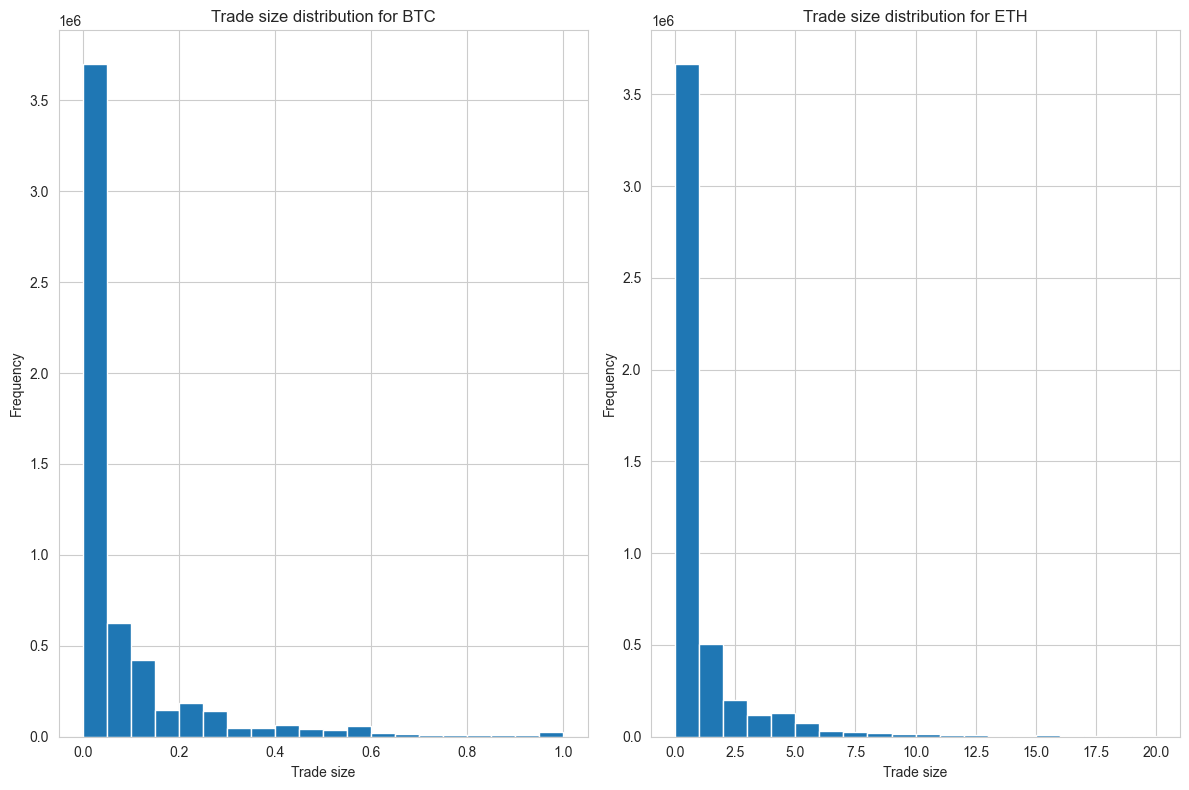

In [8]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

plt.subplot(121)
plt.hist(x=btc_trades['size'], range=(0, 1), bins=20)
plt.xlabel('Trade size')
plt.ylabel('Frequency')
plt.title('Trade size distribution for BTC')

plt.subplot(122)
plt.hist(x=eth_trades['size'], range=(0, 20), bins=20)
plt.xlabel('Trade size')
plt.ylabel('Frequency')
plt.title('Trade size distribution for ETH')

plt.tight_layout()

В основном на бирже происходят маленькие сделки. Объемы трейдов имеют экспоненциальное распределение.

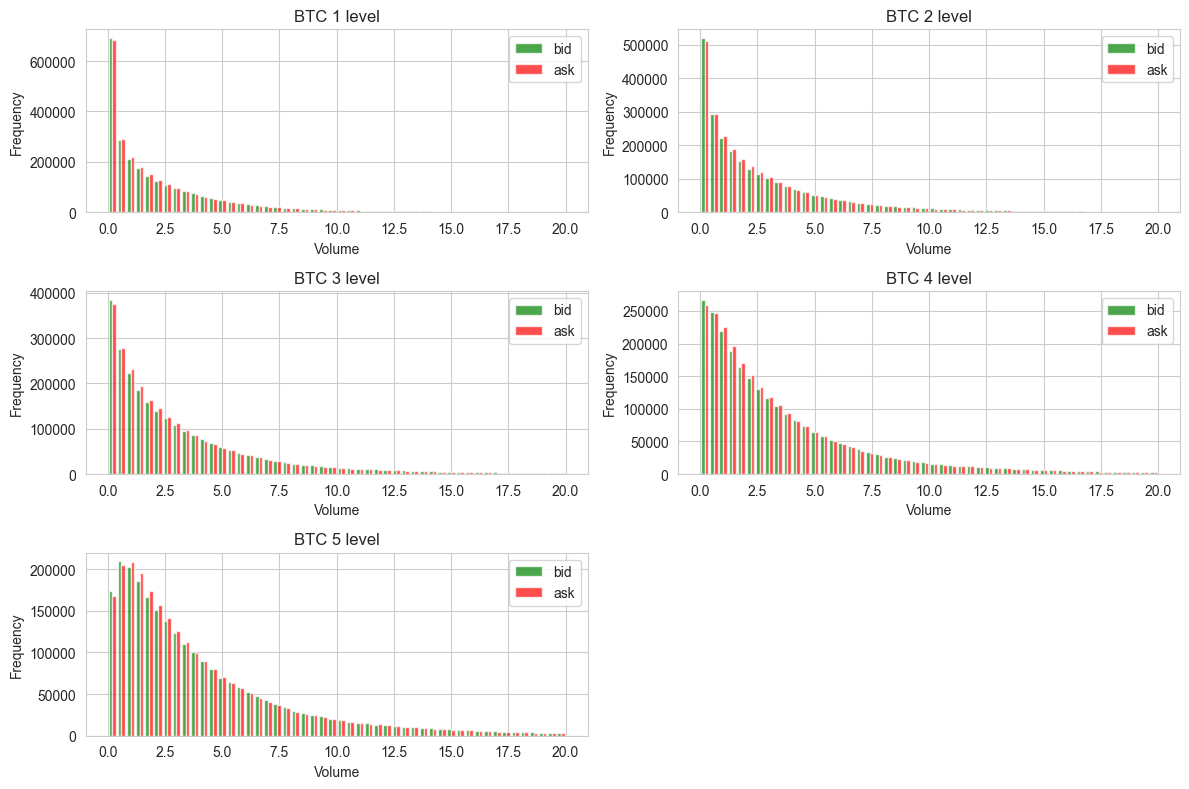

In [9]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

cur_bid_volume = btc_lobs['btcusdt:Binance:LinearPerpetual_bid_vol_0']
cur_ask_volume = btc_lobs['btcusdt:Binance:LinearPerpetual_ask_vol_0']

for i in range(5):
    plt.subplot(3, 2, i + 1)
    plt.hist(x=[cur_bid_volume, cur_ask_volume], color=['green', 'red'], range=(0, 20), alpha=0.7, bins=50, label=['bid', 'ask'])
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.title('BTC {} level'.format(i + 1))
    plt.legend()

    cur_bid_volume = cur_bid_volume + btc_lobs['btcusdt:Binance:LinearPerpetual_bid_vol_{}'.format(i + 1)]
    cur_ask_volume = cur_ask_volume + btc_lobs['btcusdt:Binance:LinearPerpetual_ask_vol_{}'.format(i + 1)]

plt.tight_layout()

На всех уровнях мы можем наблюдать что-то похожее на экспоненциальное распределение.

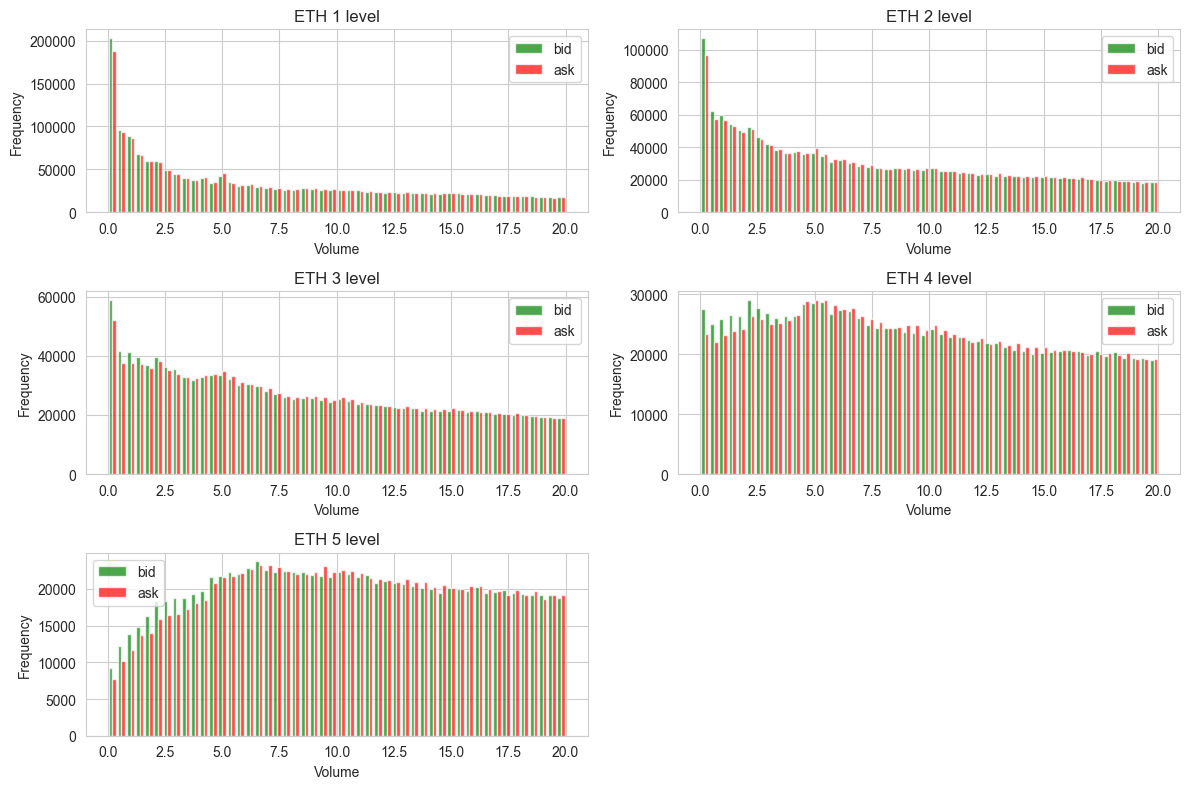

In [10]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

cur_bid_volume = eth_lobs['ethusdt:Binance:LinearPerpetual_bid_vol_0']
cur_ask_volume = eth_lobs['ethusdt:Binance:LinearPerpetual_ask_vol_0']

for i in range(5):
    plt.subplot(3, 2, i + 1)
    plt.hist(x=[cur_bid_volume, cur_ask_volume], color=['green', 'red'], range=(0, 20), alpha=0.7, bins=50, label=['bid', 'ask'])
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.title('ETH {} level'.format(i + 1))
    plt.legend()

    cur_bid_volume = cur_bid_volume + eth_lobs['ethusdt:Binance:LinearPerpetual_bid_vol_{}'.format(i + 1)]
    cur_ask_volume = cur_ask_volume + eth_lobs['ethusdt:Binance:LinearPerpetual_ask_vol_{}'.format(i + 1)]

plt.tight_layout()

На первых уровнях мы наблюдаем нечто похожее на экспоненциальное распределение, на более глубоких уровнях распределение становится более равномерным.

Смерджим данные трейдов с данными о стаканах для BTC и построим график пробитий стакана.

In [11]:
btc_lobs_best = btc_lobs[
    ['exchange_ts', 'btcusdt:Binance:LinearPerpetual_ask_price_0', 'btcusdt:Binance:LinearPerpetual_ask_vol_0',
     'btcusdt:Binance:LinearPerpetual_bid_price_0', 'btcusdt:Binance:LinearPerpetual_bid_vol_0']]
btc_lobs_best['index'] = np.arange(len(btc_lobs_best))
btc_merged = btc_lobs_best.merge(btc_trades, how="inner", on='exchange_ts')

btc_ask = btc_merged[btc_merged['aggro_side'] == 'ASK']
btc_ask = btc_ask.groupby(by='exchange_ts').agg(
    {'price': 'mean', 'size': 'sum', 'index' : 'max'})

btc_ask['new_bid'] = btc_lobs.loc[btc_ask['index'] + 1, 'btcusdt:Binance:LinearPerpetual_bid_price_0'].values
btc_ask['delta'] = btc_ask['new_bid'] - btc_ask['price']



C:\Users\Rs63\AppData\Local\Temp\ipykernel_27612\2577183284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_lobs_best['index'] = np.arange(len(btc_lobs_best))


In [12]:
btc_bid = btc_merged[btc_merged['aggro_side'] == 'BID']
btc_bid = btc_bid.groupby(by='exchange_ts').agg(
    {'btcusdt:Binance:LinearPerpetual_bid_price_0': 'min', 'price': 'mean', 'size': 'sum', 'index' : 'max'})

btc_bid['new_ask'] = btc_lobs.loc[btc_bid['index'] + 1, 'btcusdt:Binance:LinearPerpetual_ask_price_0'].values
btc_bid['delta'] = btc_bid['new_ask'] - btc_bid['price']

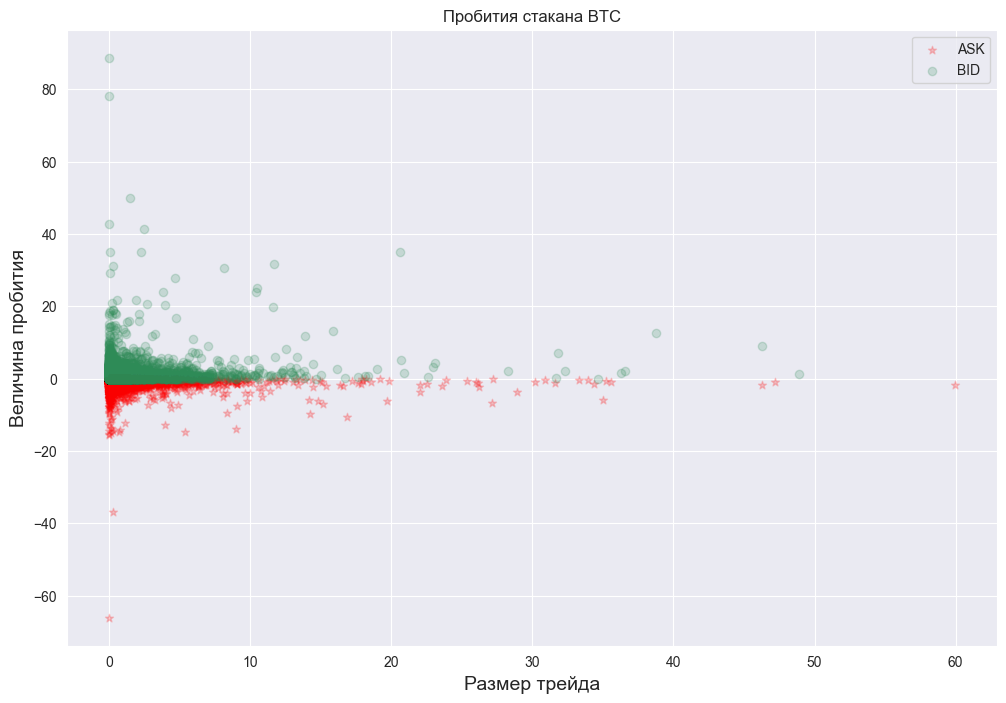

In [13]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')

plt.scatter(btc_ask[btc_ask['delta'] <= 0]['size'], btc_ask[btc_ask['delta'] <= 0]['delta'], c='red', alpha=0.2, marker='*', label='ASK')
plt.scatter(btc_bid[btc_bid['delta'] >= 0]['size'], btc_bid[btc_bid['delta'] >= 0]['delta'], c='seagreen', alpha=0.2, label='BID')

plt.title('Пробития стакана BTC')
plt.xlabel('Размер трейда', fontsize=14)
plt.ylabel('Величина пробития', fontsize=14)
plt.legend(loc='best');

Смерджим данные трейдов с данными о стаканах для ETH и построим график пробитий стакана.

In [14]:
eth_lobs_best = eth_lobs[
    ['exchange_ts', 'ethusdt:Binance:LinearPerpetual_ask_price_0', 'ethusdt:Binance:LinearPerpetual_ask_vol_0',
     'ethusdt:Binance:LinearPerpetual_bid_price_0', 'ethusdt:Binance:LinearPerpetual_bid_vol_0']]
eth_lobs_best['index'] = np.arange(len(eth_lobs_best))
eth_merged = eth_lobs_best.merge(eth_trades, how="inner", on='exchange_ts')

eth_ask = eth_merged[eth_merged['aggro_side'] == 'ASK']
eth_ask = eth_ask.groupby(by='exchange_ts').agg(
    {'price': 'mean', 'size': 'sum', 'index' : 'max'})

eth_ask['new_bid'] = eth_lobs.loc[eth_ask['index'] + 1, 'ethusdt:Binance:LinearPerpetual_bid_price_0'].values
eth_ask['delta'] = eth_ask['new_bid'] - eth_ask['price']



C:\Users\Rs63\AppData\Local\Temp\ipykernel_27612\64924881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_lobs_best['index'] = np.arange(len(eth_lobs_best))


In [15]:
eth_bid = eth_merged[eth_merged['aggro_side'] == 'BID']
eth_bid = eth_bid.groupby(by='exchange_ts').agg(
    {'ethusdt:Binance:LinearPerpetual_bid_price_0': 'min', 'price': 'mean', 'size': 'sum', 'index' : 'max'})

eth_bid['new_ask'] = eth_lobs.loc[eth_bid['index'] + 1, 'ethusdt:Binance:LinearPerpetual_ask_price_0'].values
eth_bid['delta'] = eth_bid['new_ask'] - eth_bid['price']

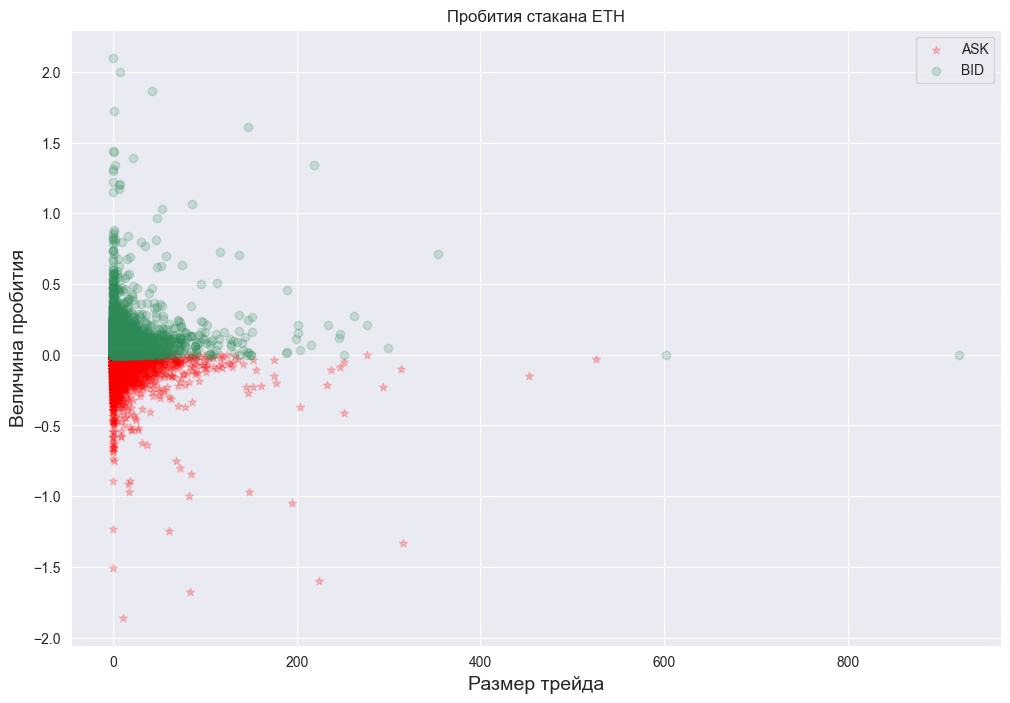

In [16]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')

plt.scatter(eth_ask[eth_ask['delta'] <= 0]['size'], eth_ask[eth_ask['delta'] <= 0]['delta'], c='red', alpha=0.2, marker='*', label='ASK')
plt.scatter(eth_bid[eth_bid['delta'] >= 0]['size'], eth_bid[eth_bid['delta'] >= 0]['delta'], c='seagreen', alpha=0.2, label='BID')

plt.title('Пробития стакана ETH')
plt.xlabel('Размер трейда', fontsize=14)
plt.ylabel('Величина пробития', fontsize=14)
plt.legend(loc='best');

Посмотрим на объемы торгов в USDT

In [17]:
btc_usd_volumes = (btc_trades['size'] * btc_trades['price']).cumsum()
eth_usd_volumes = (eth_trades['size'] * eth_trades['price']).cumsum()


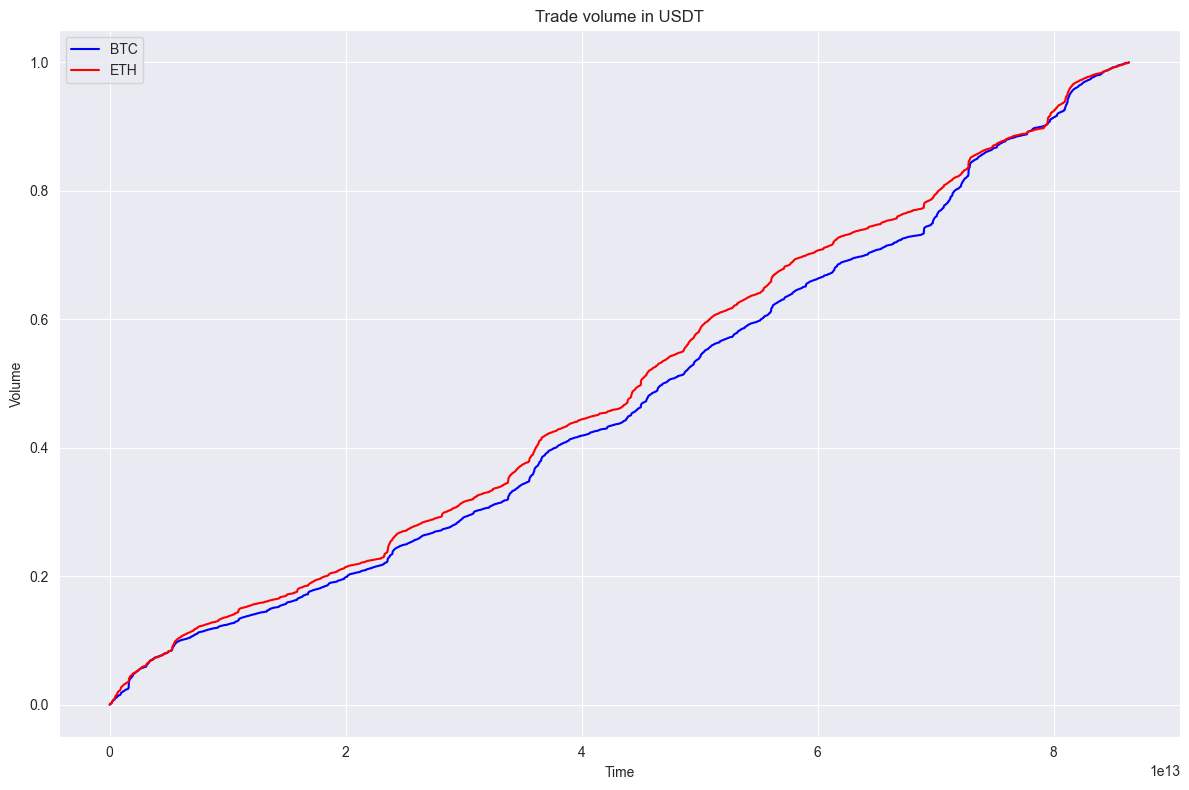

In [18]:
plt.figure(figsize=(12, 8))

plt.plot(btc_trades['exchange_ts'] - btc_trades['exchange_ts'].min(), (btc_usd_volumes - btc_usd_volumes.min()) / (btc_usd_volumes.max() - btc_usd_volumes.min()), color='blue', label='BTC')
plt.plot(eth_trades['exchange_ts'] - eth_trades['exchange_ts'].min(), (eth_usd_volumes - eth_usd_volumes.min()) / (eth_usd_volumes.max() - eth_usd_volumes.min()), color='red', label='ETH')
plt.title('Trade volume in USDT')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()

По графикам видно, что объем торгов ETH/USDT отстает от BTC/USDT. При этом у биткоина в конце резкий скачок объемов, никак не повлиявший на объем торгов эфира.

**Выводы:** глобальные тренды у цен на биткоин и эфир схожие. Так как объем торгов биткоина выше, чем у эфира, можно сделать вывод, что эфир подвержен влиянию биткоина и цена на эфир следует за ценой биткоина.

In [19]:
btc_lobs

,receive_ts,exchange_ts,btcusdt:Binance:LinearPerpetual_ask_price_0,btcusdt:Binance:LinearPerpetual_ask_vol_0,btcusdt:Binance:LinearPerpetual_bid_price_0,btcusdt:Binance:LinearPerpetual_bid_vol_0,btcusdt:Binance:LinearPerpetual_ask_price_1,btcusdt:Binance:LinearPerpetual_ask_vol_1,btcusdt:Binance:LinearPerpetual_bid_price_1,btcusdt:Binance:LinearPerpetual_bid_vol_1,...,btcusdt:Binance:LinearPerpetual_bid_price_7,btcusdt:Binance:LinearPerpetual_bid_vol_7,btcusdt:Binance:LinearPerpetual_ask_price_8,btcusdt:Binance:LinearPerpetual_ask_vol_8,btcusdt:Binance:LinearPerpetual_bid_price_8,btcusdt:Binance:LinearPerpetual_bid_vol_8,btcusdt:Binance:LinearPerpetual_ask_price_9,btcusdt:Binance:LinearPerpetual_ask_vol_9,btcusdt:Binance:LinearPerpetual_bid_price_9,btcusdt:Binance:LinearPerpetual_bid_vol_9
0,1655942402250125991,1655942402249000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19976.7,0.066,...,19975.7,4.455,19980.1,0.01,19975.6,1.529,19980.2,0.010,19975.4,1.641
1,1655942402657844605,1655942402655000000,19977.5,0.078,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
2,1655942403346968722,1655942403346000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
3,1655942404080791047,1655942404080000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
4,1655942404452706766,1655942404452000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541351,1656028781390653694,1656028781390000000,21089.1,0.730,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.5,0.55,21087.1,0.232,21092.6,0.001,21087.0,2.484
2541352,1656028781423672729,1656028781423000000,21089.1,0.730,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484
2541353,1656028781457683317,1656028781457000000,21089.1,0.736,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484
2541354,1656028781492806433,1656028781492000000,21089.1,0.736,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484
